<a href="https://colab.research.google.com/github/Shanu171/ML_Project_Cement_data/blob/main/Intel_image_dataset_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d puneet6060/intel-image-classification

100% 345M/346M [00:15<00:00, 25.2MB/s]
100% 346M/346M [00:15<00:00, 23.1MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/intel-image-classification.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/seg_train/seg_train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/seg_test/seg_test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.


In [6]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [7]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(6,activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [9]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [10]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)



Epoch 1/10
439/439 [==============================] - 61s 116ms/step - loss: 3.7442 - accuracy: 0.4218 - val_loss: 2.0393 - val_accuracy: 0.3867
Epoch 2/10
439/439 [==============================] - 49s 112ms/step - loss: 1.3576 - accuracy: 0.4951 - val_loss: 1.2996 - val_accuracy: 0.5410
Epoch 3/10
439/439 [==============================] - 50s 112ms/step - loss: 1.1195 - accuracy: 0.5837 - val_loss: 4.1592 - val_accuracy: 0.3290
Epoch 4/10
439/439 [==============================] - 50s 112ms/step - loss: 0.9664 - accuracy: 0.6401 - val_loss: 1.7688 - val_accuracy: 0.5720
Epoch 5/10
439/439 [==============================] - 49s 112ms/step - loss: 0.8465 - accuracy: 0.6914 - val_loss: 3.1249 - val_accuracy: 0.4460
Epoch 6/10
439/439 [==============================] - 50s 113ms/step - loss: 0.7723 - accuracy: 0.7222 - val_loss: 1.0796 - val_accuracy: 0.6693
Epoch 7/10
439/439 [==============================] - 51s 116ms/step - loss: 0.6779 - accuracy: 0.7611 - val_loss: 0.9324 - val_ac

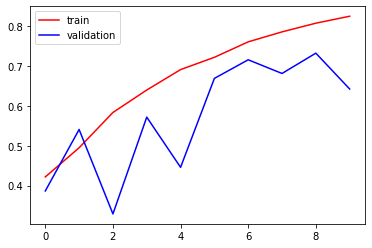

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

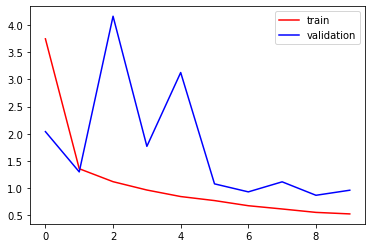

In [12]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [13]:
data_augmentation = tf.keras.Sequential([
    
    tf.keras.layers.RandomFlip(mode="horizontal",seed=42),
    tf.keras.layers.RandomRotation(factor=0.05,seed=42),
    tf.keras.layers.RandomContrast(factor=0.2,seed=42),
])

In [15]:
base_model = tf.keras.applications.xception.Xception(weights="imagenet",include_top=False) ##provide website - https://keras.io/api/applications/
avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(6, activation="softmax")(avg)
model = tf.keras.Model(inputs=base_model.input, outputs=output)


In [17]:
for layer in base_model.layers:
    layer.trainable = False


In [18]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(loss="sparse_categorical_crossentropy",optimizer = optimizer, metrics=["accuracy"]
              )
history = model.fit(train_ds,epochs=5,validation_data=validation_ds)

Epoch 1/5
439/439 [==============================] - 102s 223ms/step - loss: 0.3308 - accuracy: 0.8841 - val_loss: 0.2604 - val_accuracy: 0.9037
Epoch 2/5
439/439 [==============================] - 95s 216ms/step - loss: 0.2451 - accuracy: 0.9100 - val_loss: 0.2695 - val_accuracy: 0.8963
Epoch 3/5
439/439 [==============================] - 94s 214ms/step - loss: 0.2284 - accuracy: 0.9149 - val_loss: 0.2348 - val_accuracy: 0.9107
Epoch 4/5
439/439 [==============================] - 95s 215ms/step - loss: 0.2167 - accuracy: 0.9206 - val_loss: 0.2291 - val_accuracy: 0.9137
Epoch 5/5
439/439 [==============================] - 99s 224ms/step - loss: 0.2075 - accuracy: 0.9230 - val_loss: 0.2308 - val_accuracy: 0.9153


In [19]:
for layer in base_model.layers[55:]:
    layer.trainable = True

In [20]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss="sparse_categorical_crossentropy",optimizer = optimizer, metrics=["accuracy"]
              )
history = model.fit(train_ds,validation_data = validation_ds,epochs=10)

Epoch 1/10
439/439 [==============================] - 181s 405ms/step - loss: 0.2650 - accuracy: 0.9085 - val_loss: 0.2138 - val_accuracy: 0.9270
Epoch 2/10
439/439 [==============================] - 177s 402ms/step - loss: 0.1669 - accuracy: 0.9434 - val_loss: 0.2016 - val_accuracy: 0.9280
Epoch 3/10
439/439 [==============================] - 177s 402ms/step - loss: 0.1288 - accuracy: 0.9564 - val_loss: 0.2058 - val_accuracy: 0.9310
Epoch 4/10
439/439 [==============================] - 177s 402ms/step - loss: 0.0956 - accuracy: 0.9682 - val_loss: 0.1986 - val_accuracy: 0.9313
Epoch 5/10
439/439 [==============================] - 177s 402ms/step - loss: 0.0736 - accuracy: 0.9780 - val_loss: 0.2082 - val_accuracy: 0.9297
Epoch 6/10
439/439 [==============================] - 177s 402ms/step - loss: 0.0515 - accuracy: 0.9858 - val_loss: 0.2138 - val_accuracy: 0.9303
Epoch 7/10
439/439 [==============================] - 176s 401ms/step - loss: 0.0426 - accuracy: 0.9892 - val_loss: 0.2228 -

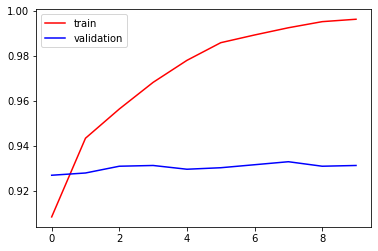

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

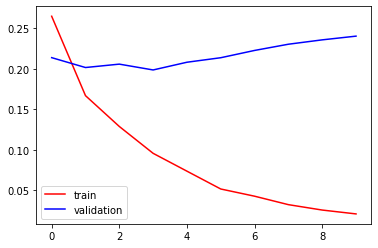

In [22]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()